In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('mpg.csv',index_col='name')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


continuous variables : mpg,displacement,horsepower,weight,acceleration

discrete variables: cylinders,model year,origin

car name: string (unique for each instance)

In [3]:
data['model_year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [4]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [5]:
data.shape

(398, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


#### horsepower is of type object

In [7]:
#check if any null values are present in the dataset
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

#### There is a '?' in the horsepower column which is a place holder for missing values

In [9]:
data_cpy = data
data_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 28.0+ KB


In [10]:
data = data[data['horsepower'] != '?']
data.shape

(392, 8)

In [11]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

horsepower is still an object. This is because pandas coerced the entire column as object when we imported the data set due to '?', so lets change that data to float

In [12]:
data['horsepower'] = data['horsepower'].astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [13]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Extracting the company name from Car name

In [14]:
data['company_name'] = data.index.str.extract('(^.*?)\s')
data['company_name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'chevy', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'toyouta', 'maxda', 'honda', nan,
       'chevroelt', 'capri', 'vw', 'mercedes-benz', 'cadillac', 'subaru',
       'mercedes', 'vokswagen', 'triumph', 'nissan'], dtype=object)

In [15]:
data[data['company_name'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company_name
name,,,,,,,,,
subaru,26.0,4,108.0,93.0,2391,15.5,74,3,NaN
subaru,32.3,4,97.0,67.0,2065,17.8,81,3,NaN


Since there are multiple values for single car brand, replace them with Single value.
For Subaru brand, replace null values with name

In [16]:
data['company_name'] = data['company_name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['company_name'] = data['company_name'].replace('maxda','mazda')
data['company_name'] = data['company_name'].replace('toyouta','toyota')
data['company_name'] = data['company_name'].replace('mercedes','mercedes-benz')
data['company_name'] = data['company_name'].replace('nissan','datsun')
data['company_name'] = data['company_name'].replace('capri','ford')
data['company_name'] = data['company_name'].replace(['chevroelt','chevy'],'chevrolet')
data['company_name'].fillna(value = 'subaru',inplace=True) 

In [17]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company_name
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,buick
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,amc
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,ford


By observing the company names, we can say that cars with origin 1 are from USA, cars with origin 2 are from Europe, cars with origin 3 are from Japan. Hence adding Country_code column with respective country codes

In [18]:
data['country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company_name,country_code
name,,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet,USA
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,buick,USA
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth,USA
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,amc,USA
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,ford,USA


### Exploring the data

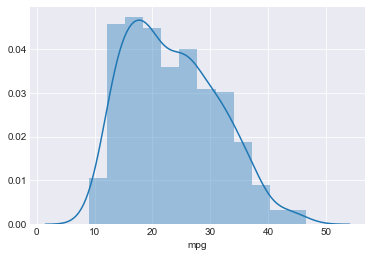

In [19]:
sns.set_style('darkgrid')
sns.distplot(data['mpg'])

In [20]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


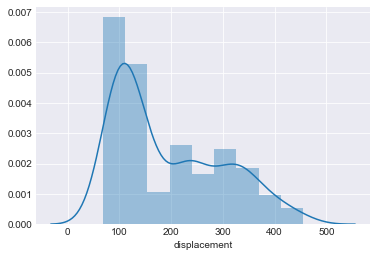

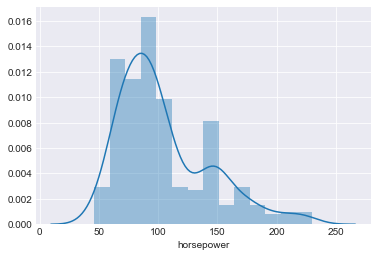

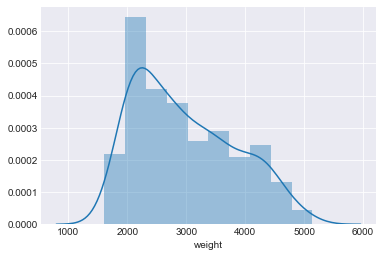

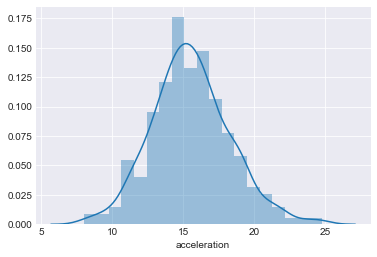

In [21]:
#features = data.columns.tolist()
for i in ['displacement','horsepower','weight','acceleration']:
    sns.distplot(data[i])
    plt.show()

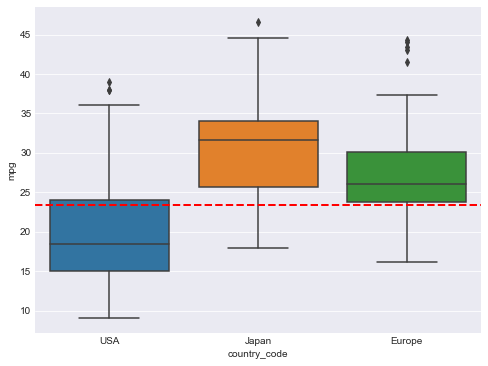

In [22]:
var = 'country_code'
data_plt = pd.concat([data['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The red line marks the average of the set. From the above plot we can observe:

Majority of the cars from USA (almost 75%) have MPG below global average.
Majority of the cars from Japan and Europe have MPG above global average.

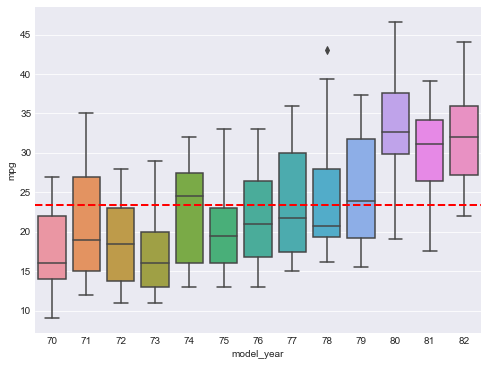

In [23]:
var = 'model_year'
data_plt = pd.concat([data['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

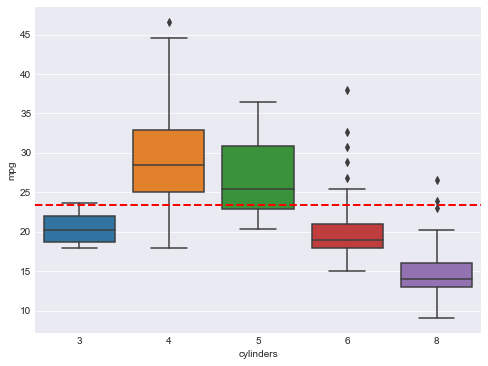

In [24]:
var = 'cylinders'
data_plt = pd.concat([data['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

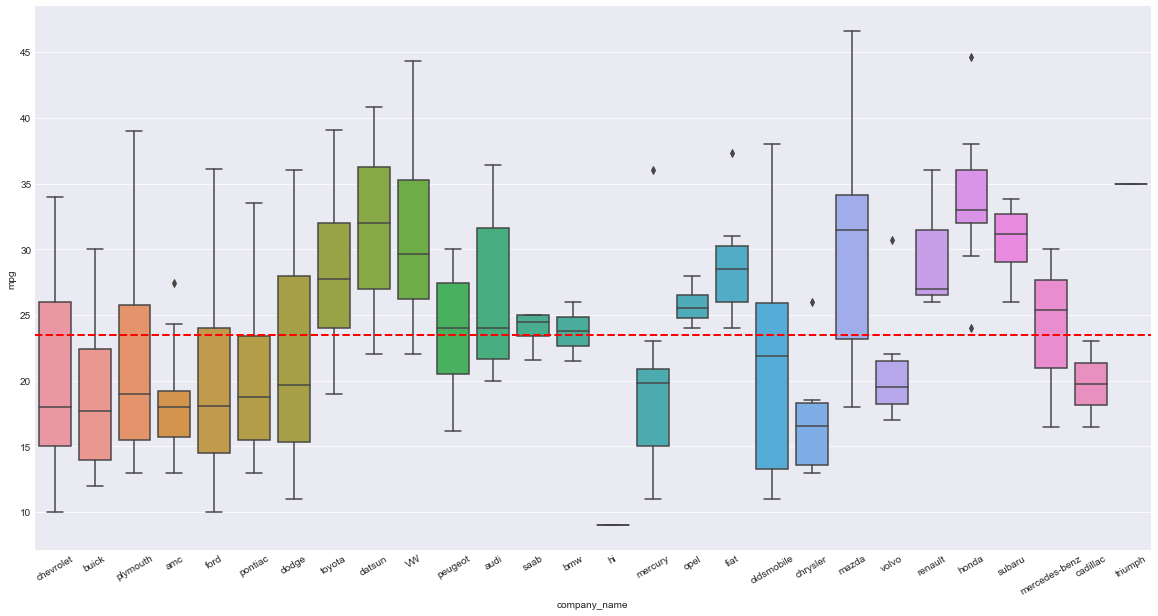

In [25]:
var = 'company_name'
data_plt = pd.concat([data['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.axhline(data.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

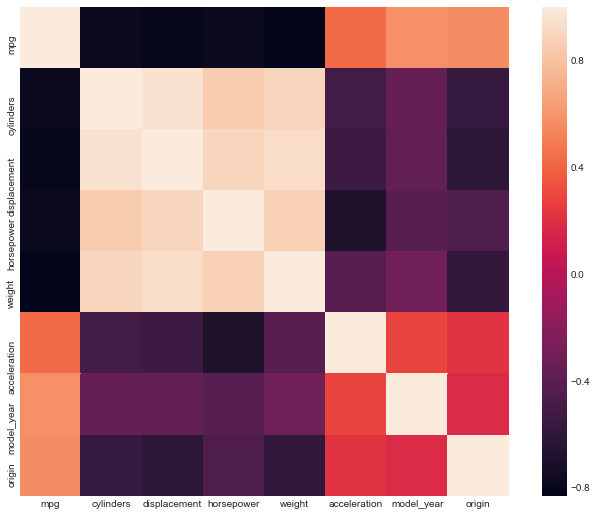

In [26]:
corr_mat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, square=True)

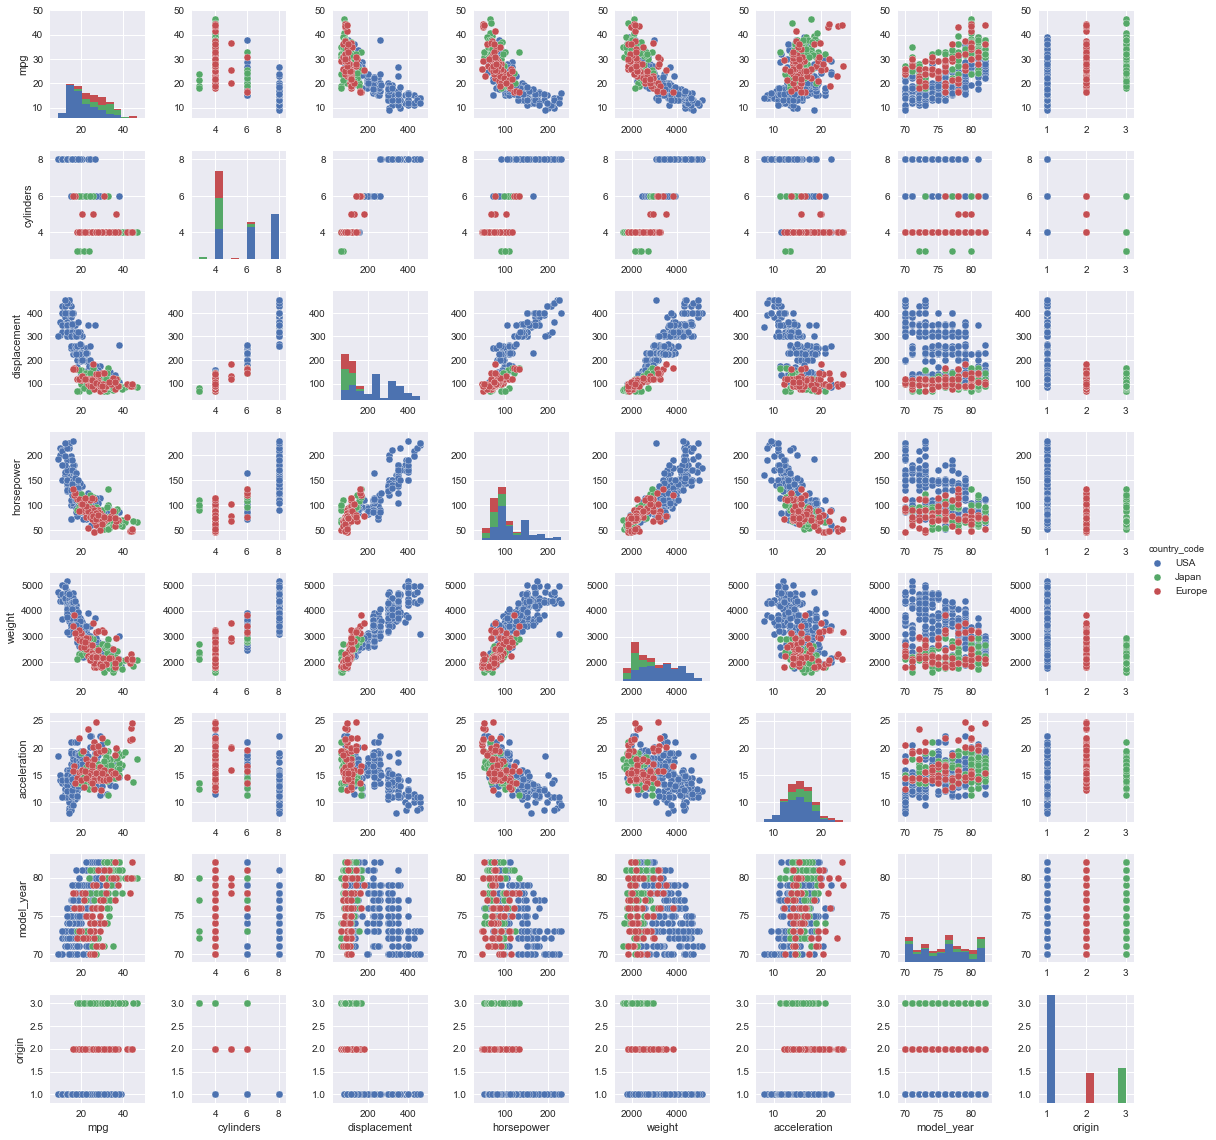

In [27]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.0,hue ='country_code')
plt.show()

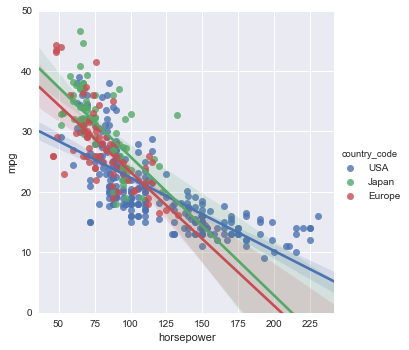

In [28]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

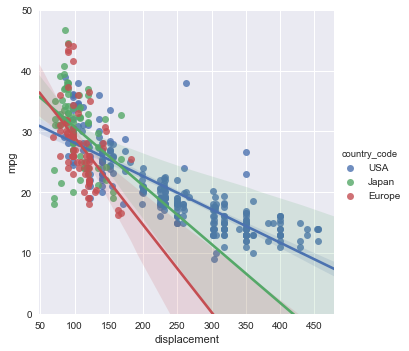

In [29]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

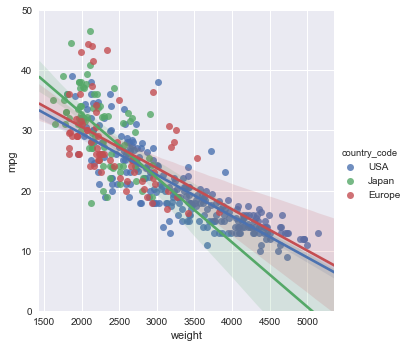

In [30]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

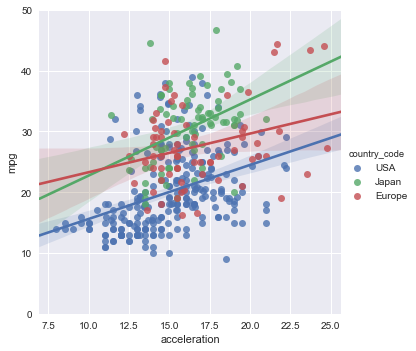

In [31]:
var = 'acceleration'
plot = sns.lmplot(var,'mpg',data=data,hue='country_code')
plot.set(ylim = (0,50))

In [32]:
data = data.reset_index()

Creating dummy variabes for categorical data

In [33]:
data_dummies = pd.get_dummies(data=data, columns=['country_code','model_year'])
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 25 columns):
name                   392 non-null object
mpg                    392 non-null float64
cylinders              392 non-null int64
displacement           392 non-null float64
horsepower             392 non-null float64
weight                 392 non-null int64
acceleration           392 non-null float64
origin                 392 non-null int64
company_name           392 non-null object
country_code_Europe    392 non-null uint8
country_code_Japan     392 non-null uint8
country_code_USA       392 non-null uint8
model_year_70          392 non-null uint8
model_year_71          392 non-null uint8
model_year_72          392 non-null uint8
model_year_73          392 non-null uint8
model_year_74          392 non-null uint8
model_year_75          392 non-null uint8
model_year_76          392 non-null uint8
model_year_77          392 non-null uint8
model_year_78          392 non-null uint8
mod

In [34]:
X = data_dummies.drop(['mpg','company_name','origin','name'],axis=1)
y = data_dummies['mpg']

In [35]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,country_code_Europe,country_code_Japan,country_code_USA,model_year_70,model_year_71,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,8,307.0,130.0,3504,12.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165.0,3693,11.5,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150.0,3436,11.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8,304.0,150.0,3433,12.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140.0,3449,10.5,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=10)

Since the features are skewed, I would like to use MinMax scaler which scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['displacement','horsepower','weight','acceleration']] = scaler.fit_transform(X_train[['displacement','horsepower','weight','acceleration']])
X_test[['displacement','horsepower','weight','acceleration']] = scaler.transform(X_test[['displacement','horsepower','weight','acceleration']])

In [38]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,country_code_Europe,country_code_Japan,country_code_USA,model_year_70,model_year_71,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
258,6,0.405685,0.347826,0.600539,0.636905,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
29,4,0.074935,0.228261,0.154698,0.386905,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
202,4,0.043928,0.130435,0.112807,0.535714,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
147,4,0.134367,0.277174,0.262118,0.416667,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
70,3,0.005168,0.277174,0.214542,0.327381,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,country_code_Europe,country_code_Japan,country_code_USA,model_year_70,model_year_71,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
241,3,0.031008,0.347826,0.331239,0.327381,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
366,4,0.173127,0.206522,0.272890,0.476190,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
298,8,0.496124,0.239130,0.540694,0.845238,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
341,4,0.033592,0.076087,0.043986,0.482143,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
263,8,0.645995,0.510870,0.738181,0.339286,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print('Training score :{:.3f}'.format(lr.score(X_train,y_train)))
print('Testing score :{:,.3f}'.format(lr.score(X_test,y_test)))

Training score :0.855
Testing score :0.839


In [41]:
import statsmodels.api as sm

X1 = sm.add_constant(X_train)
result = sm.OLS(y_train, X1).fit()

print('R-squared :{:.3f}, Adjusted R-squared :{:.3f}'.format(result.rsquared, result.rsquared_adj))

R-squared :0.855, Adjusted R-squared :0.845


In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     84.77
Date:                Fri, 09 Mar 2018   Prob (F-statistic):          7.98e-103
Time:                        17:18:08   Log-Likelihood:                -736.94
No. Observations:                 294   AIC:                             1514.
Df Residuals:                     274   BIC:                             1588.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.5600    

In [43]:
print(lr.intercept_)

34.6359416358


In [44]:
coeff_df = pd.DataFrame(lr.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.623169
displacement,9.450592
horsepower,-6.555689
weight,-19.519570
acceleration,0.033823
country_code_Europe,0.482176
country_code_Japan,1.139961
country_code_USA,-1.622137
model_year_70,-2.936367
model_year_71,-2.243213


From the above output, the below coefficients can be considered as most important

weight , displacement, horsepower, model_year_80 , model_year_82

### Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Weight of the car is associated with a decrease of 19.52 units of mpg .

Holding all other features fixed, a 1 unit increase in displacement is associated with an increase of 9.45 units of mpg.

Holding all other features fixed, a 1 unit increase in horsepower is associated with a decrease of 6.56 units of mpg .

Holding all other features fixed, a car which has a model_year_80 is expected to have 5.91 more mpg compared to cars with other model_years.

Holding all other features fixed, a car which has a model_year_82 is expected to have 5.74 more mpg compared to cars with other model_years.

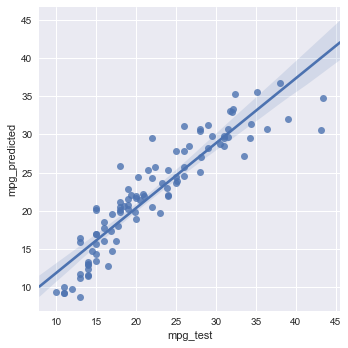

In [45]:
actual_pred = pd.DataFrame({'mpg_test':y_test,'mpg_predicted':y_predict})
sns.lmplot(x='mpg_test',y='mpg_predicted',data=actual_pred)

In [46]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 2.34759601997
MSE: 9.51857058296
RMSE: 3.08521807705


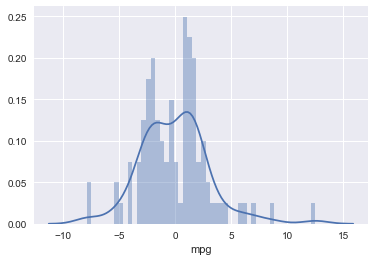

In [47]:
sns.distplot((y_test-y_predict),bins=50)

### Preparing data for Cross-validation

In [48]:
X[['displacement','horsepower','weight','acceleration']] = scaler.fit_transform(X[['displacement','horsepower','weight','acceleration']])
#X_scaled = pd.DataFrame(X_scaled_few,columns=['displacement','horsepower','weight','acceleration'])
X.head()

,cylinders,displacement,horsepower,weight,acceleration,country_code_Europe,country_code_Japan,country_code_USA,model_year_70,model_year_71,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,8,0.617571,0.456522,0.536150,0.238095,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0.728682,0.646739,0.589736,0.208333,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0.645995,0.565217,0.516870,0.178571,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0.609819,0.565217,0.516019,0.238095,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0.604651,0.510870,0.520556,0.148810,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_scaled_few = scaler.fit_transform(X[['displacement','horsepower','weight','acceleration']])
X_scaled = pd.DataFrame(X_scaled_few,columns=['displacement','horsepower','weight','acceleration'])

In [50]:
X_scaled.head()

,displacement,horsepower,weight,acceleration
0,0.617571,0.456522,0.536150,0.238095
1,0.728682,0.646739,0.589736,0.208333
2,0.645995,0.565217,0.516870,0.178571
3,0.609819,0.565217,0.516019,0.238095
4,0.604651,0.510870,0.520556,0.148810


In [51]:
X_scaled = pd.concat([X_scaled,X.drop(['displacement','horsepower','weight','acceleration'],axis=1)],axis=1)
X_scaled.head()

,displacement,horsepower,weight,acceleration,cylinders,country_code_Europe,country_code_Japan,country_code_USA,model_year_70,model_year_71,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,0.617571,0.456522,0.536150,0.238095,8,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.728682,0.646739,0.589736,0.208333,8,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.645995,0.565217,0.516870,0.178571,8,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.609819,0.565217,0.516019,0.238095,8,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.604651,0.510870,0.520556,0.148810,8,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Cross Validation

In [52]:
#Cross Validation to check
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr,X_scaled,y,cv=15)
print(scores)
print('Average score: {}'.format(np.mean(scores)))

[ 0.7216101   0.82112377  0.67286061  0.57092627  0.49928818  0.78877582
  0.79755554  0.82751986  0.88522197  0.59793515  0.10558623  0.33593905
  0.42640253  0.61218547  0.48507998]
Average score: 0.6098673689704379


### Trying to improve the model by applying Rigde, Lasso regressions

In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge()
rd = ridge.fit(X_train,y_train)
rd_predict = rd.predict(X_test)
print('Training score : {:.3f}'.format(rd.score(X_train,y_train)))
print('Testing score : {:.3f}'.format(rd.score(X_test,y_test)))

Training score : 0.848
Testing score : 0.833


#### Grid Search for finding the best parameter

In [54]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params_grid = {'alpha':[0.01,1,5,10,50,100]}
grid_search = GridSearchCV(ridge,params_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
print('Best parameters{:}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.01}
Best score 0.826


In [56]:
params_grid = {'alpha':[0.001,0.005,0.01,0.05,0.1]}
grid_search = GridSearchCV(ridge,params_grid,cv=5)
grid_search.fit(X_train,y_train)
print('Best parameters{:}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.05}
Best score 0.826


In [57]:
params_grid = {'alpha':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]}
grid_search = GridSearchCV(ridge,params_grid,cv=5)
grid_search.fit(X_train,y_train)
print('Best parameters{:}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.06}
Best score 0.826


#### Cross Validation with best parameter(Alpha=0.06)

In [58]:
#From grid-search and plot above, we decide to take alpha=0.007
ridge = Ridge(alpha=0.06)
ridge.fit(X_train,y_train)
scores_test = cross_val_score(ridge, X_scaled, y, cv = 15)
print(scores_test)
print('Average score: {}'.format(np.mean(scores_test)))

[ 0.75286899  0.83593028  0.67180398  0.57888289  0.4962996   0.79617004
  0.80202883  0.82912604  0.88421614  0.59326707  0.10374431  0.33971181
  0.42194043  0.60733492  0.47848394]
Average score: 0.6127872851597


In [59]:
predict_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, predict_ridge))
print('RMSE:', rmse_ridge)

RMSE: 3.08183498181


### Lasso Regression

#### Grid Search for finding out the best parameter

In [60]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 10000)
param_grid = {'alpha':[0.01,0.1,1, 5, 10, 20, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.01}
Best score 0.826


In [61]:
param_grid = {'alpha':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5,return_train_score=True)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.3f}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.004}
Best score 0.827


#### Cross Validation with best parameter(Alpha=0.004) 

In [62]:
lasso = Lasso(max_iter = 10000,alpha=0.004)
lasso.fit(X_train,y_train)
scores_test = cross_val_score(lasso, X_scaled, y, cv = 15)
print(scores_test)
print('average score :{:.3f}'.format(np.mean(scores_test)))

[ 0.72468035  0.8700068   0.65943267  0.57944598  0.47446882  0.80772081
  0.7897053   0.834534    0.87097412  0.59750558  0.1184235   0.32346711
  0.41623222  0.58038783  0.44898308]
average score :0.606


In [63]:
predict_lasso = lasso.predict(X_test)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, predict_lasso))
print('RMSE:', rmse_lasso)

RMSE: 3.07168856314


Even By applying Ridge and Lasso, our RMSE value has not reduced much.

So Lets try Polynomial regression by creating polynomial varibles for the desired features

### Polynomial Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures

creating a copy of X and working on it

In [65]:
X_copy = pd.DataFrame.copy(X)
X_copy.head()

,cylinders,displacement,horsepower,weight,acceleration,country_code_Europe,country_code_Japan,country_code_USA,model_year_70,model_year_71,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,8,0.617571,0.456522,0.536150,0.238095,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0.728682,0.646739,0.589736,0.208333,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0.645995,0.565217,0.516870,0.178571,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0.609819,0.565217,0.516019,0.238095,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0.604651,0.510870,0.520556,0.148810,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Creating polynomial features for 'displacement','horsepower','weight','acceleration','cylinders'

In [66]:
poly = PolynomialFeatures(degree=2)

X_poly_cat = poly.fit_transform(X_copy[['displacement','horsepower','weight','acceleration','cylinders']])
X_poly_df = pd.DataFrame(X_poly_cat)
X_poly_final = pd.concat([X_poly_df,X_copy.drop(['displacement','horsepower','weight','acceleration','cylinders'],axis=1)],axis=1)

In [67]:
X_poly_final.head()

,0,1,2,3,4,5,6,7,8,9,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,1.0,0.617571,0.456522,0.536150,0.238095,8.0,0.381394,0.281935,0.331111,0.147041,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.728682,0.646739,0.589736,0.208333,8.0,0.530978,0.471267,0.429730,0.151809,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.645995,0.565217,0.516870,0.178571,8.0,0.417309,0.365128,0.333895,0.115356,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.609819,0.565217,0.516019,0.238095,8.0,0.371879,0.344680,0.314678,0.145195,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.604651,0.510870,0.520556,0.148810,8.0,0.365603,0.308898,0.314755,0.089978,...,0,0,0,0,0,0,0,0,0,0


Train and test splits

In [68]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly_final, y, test_size = 0.25, random_state=10)

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_p,y_train_p)
lin_reg.predict(X_test_p)
print('Training score: {:.4f}'.format(lin_reg.score(X_train_p,y_train_p)))
print('Testing score: {:.4f}'.format(lin_reg.score(X_test_p,y_test_p)))

Training score: 0.8957
Testing score: 0.8867


#### Cross validation 

In [70]:
from sklearn.model_selection import cross_val_score

scores_test = cross_val_score(lin_reg, X_poly_final, y, cv = 15)
print(scores_test)

[ 0.6796908   0.75546983  0.5533189   0.84770837  0.71274745  0.84795814
  0.46651818  0.82400392  0.93799234  0.77696274  0.45447574  0.54866373
  0.52218973  0.54289188  0.45706581]


In [71]:
print('Average score : {}'.format(np.mean(scores_test)))

Average score : 0.6618438378035915


In [72]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train_p)
result = sm.OLS(y_train_p, X2).fit()

print('R-squared :{:.3f}, Adjusted R-squared :{:.3f}'.format(result.rsquared, result.rsquared_adj))

R-squared :0.896, Adjusted R-squared :0.882


In [73]:
from sklearn import metrics

predictions_poly = lin_reg.predict(X_test_p)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test_p, predictions_poly))
print('RMSE:', rmse_poly)

RMSE: 2.59110724505


### The R2 value has increased significantly and RMSE value reduced to 2.59. Hence by including polynomial features our model is improved and gives better predictions